
# DECISION TREE CLASSIFIER 

A Decision Tree is a simple classification algorithm in which rules are learned from the training data in the if-else structure. It represents a tree-like structure, where each node is a rule or condition which divides the data set into sub-classes.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier           # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split      # FOR train_test_split function
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv('twitter_dataset.csv', encoding = 'latin-1')
dataset.head()

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.600000,195,19,53,58,0,0
1,0.705882,9,67,555,2,1,0
2,0.916667,20,21,267,0,0,1
3,0.500000,28,16,325,0,0,1
4,0.733333,45,20,515,0,0,1


In [3]:
# Independent attributes
features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)
features

['name_wt',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count']

In [4]:
#split dataset in features and target variable
X = dataset[features] # Features
y = dataset.label # Target variable

In [5]:
X
y

0       0
1       0
2       1
3       1
4       1
       ..
2813    0
2814    1
2815    0
2816    0
2817    1
Name: label, Length: 2818, dtype: int64

## CREATING TEST AND TRAIN SETS

We will randomly split our dataset in 80–20 ratio. Where 80% of the total data will be used as training set and rest 20% will be considered as test set. 

In [6]:

#     We have X_train, y_train, X_test, y_test.
#     Using these lists and dataframes we will randomly create two non-overlapping datasets 
#         1. training set
#         2. testing set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

print("Number of training instances: ", X_train.shape[0])
print("Number of testing instances: ", X_test.shape[0])

Number of training instances:  2254
Number of testing instances:  564


## TRAIN THE CLASSIFIER 

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_impurity_decrease=0.001)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

## TEST THE CLASSIFIER 

Now our model is ready. We will test our data against given labels. For every test case, predict the class label

In [8]:
#Predict the response for test dataset
y_predict = clf.predict(X_test)

In [9]:
y_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

## EVALUATION OF CLASSIFICATION RESULTS

The classifier will be evaluted using Accuracy, Recall, Precision and F-measure. For this first, a confusion matrix will be created. 

In [10]:
#true negatives is C(0,0), false negatives is C(1,0), false positives is C(0,1) and true positives is C(1,1) 
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[309   0]
 [  7 248]]


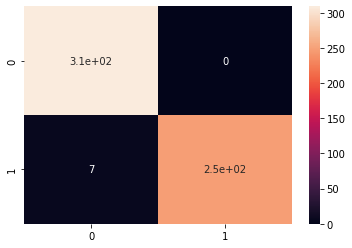

In [11]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [12]:
#true_negative
TN = conf_matrix[0][0]
#false_negative
FN = conf_matrix[1][0]
#false_positive
FP = conf_matrix[0][1]
#true_positive
TP = conf_matrix[1][1]

In [13]:
# Recall is the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. 
# High Recall indicates the class is correctly recognized (small number of FN)

recall = (TP)/(TP + FN)

In [14]:
# Precision is the the total number of correctly classified positive examples divided by the total number of predicted positive examples. 
# High Precision indicates an example labeled as positive is indeed positive (small number of FP)

precision = (TP)/(TP + FP)

In [15]:
fmeasure = (2*recall*precision)/(recall+precision)
accuracy = (TP + TN)/(TN + FN + FP + TP)

accuracy_score(y_test, y_predict)

0.9875886524822695

In [16]:
print("------ CLASSIFICATION PERFORMANCE OF DECISION TREE MODEL ------ \n"\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )


------ CLASSIFICATION PERFORMANCE OF DECISION TREE MODEL ------ 

 Recall :  97.25490196078431 %
 Precision :  100.0 %
 Accuracy :  98.75886524822694 %
 F-measure :  98.60834990059641 %


## Creating Pickle file for Easy Frontend/Client-side Access via server on Flask

In [17]:
import pickle

In [18]:
with open('pickleOutput', 'wb') as f:
    pickle.dump(clf, f)

In [19]:
# testing our pickle file

with open('pickleOutput', 'rb') as f:
    mp = pickle.load(f)
    
pickleTest = mp.predict(X_test)
pickleTest

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [20]:
pickleTest == y_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Therefore we can conclude that we have the right model saved as per predicted